In [0]:
!wget -q -nc https://raw.githubusercontent.com/pseprivamirakbarnejad/cmput206lab/master/Lab5/lab5_img.jpeg
!ls

lab5_img.jpeg  sample_data


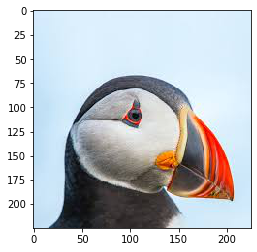

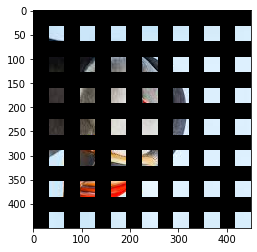

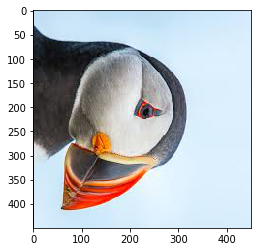

In [0]:
# Import libraries
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import warp
import skimage

image1 = io.imread('lab5_img.jpeg')
T_r = np.array([[0,1,0],[-1,0,0],[0,0,1]])
T_s = np.array([[2,0,0],[0,2,0],[0,0,1]])
h,w,_= image1.shape
image_t = np.zeros((image1.shape[0]*2,image1.shape[1]*2,image1.shape[2]),dtype = np.uint8)
image_w = np.empty((h*2,w*2,image1.shape[2]),dtype = np.uint8)
T = np.dot(T_r,T_s)

for i,row in enumerate(image1): #  range(image1.shape[0]):
  for j,col in enumerate(row):# range(image1.shape[1]):
    cr=  image1[i,j,:]
    pix=np.array([i,j,1])
    newi,newj,_ = np.dot(T,pix)
    image_t[newi,newj,:] = cr

Tn = skimage.transform.AffineTransform(scale=(2,2),rotation=np.deg2rad(90),translation=(w*2,0))
image_w = warp(image1,Tn.inverse,output_shape= image_w.shape,order=0)

plt.imshow(image1)
plt.show()
plt.imshow(image_t)
plt.show()
plt.imshow(image_w)
plt.show()

